In [299]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [300]:
data = pd.read_excel("Bank Dataset.xlsx", engine='openpyxl')

In [301]:
data

,ID,City,Age,Gender,Living with family?,Uni.Degree,Normal or Evening,Foundation or Public,Scholarship,Major,Do you work,Income Level,Familys Income Level,Famlys Job,Parafree Customer,Halkbank Customer
0,1,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Engineering,No,0,4,Private Sector,1,1
1,2,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Engineering,No,0,4,Private Sector,1,1
2,3,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Engineering,No,0,4,Private Sector,1,1
3,4,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Communication,No,0,4,Private Sector,1,1
4,5,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Communication,No,0,4,Private Sector,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,39169,Denizli,19,Male,No,Bechelors,Normal,Foundation,0,Agreculture,No,0,3,Other,0,1
39169,39170,Ankara,21,Male,Yes,Bechelors,Normal,Public,100,Faculty of Education,Yes,4,4,Self-Employment,0,1
39170,39171,Ankara,23,Male,Yes,Bechelors,Normal,Public,100,Engineering,No,0,3,Retired,0,1
39171,39172,Antalya,21,Male,Yes,Bechelors,Normal,Public,100,Secience and Literature,No,0,4,Private Sector,0,1


In [302]:
data.dropna(axis=1, inplace=True)

In [303]:
data

,ID,City,Age,Gender,Living with family?,Uni.Degree,Normal or Evening,Foundation or Public,Scholarship,Major,Do you work,Income Level,Familys Income Level,Famlys Job,Parafree Customer,Halkbank Customer
0,1,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Engineering,No,0,4,Private Sector,1,1
1,2,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Engineering,No,0,4,Private Sector,1,1
2,3,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Engineering,No,0,4,Private Sector,1,1
3,4,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Communication,No,0,4,Private Sector,1,1
4,5,Izmir,21,Female,Yes,Bechelors,Normal,Public,100,Communication,No,0,4,Private Sector,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,39169,Denizli,19,Male,No,Bechelors,Normal,Foundation,0,Agreculture,No,0,3,Other,0,1
39169,39170,Ankara,21,Male,Yes,Bechelors,Normal,Public,100,Faculty of Education,Yes,4,4,Self-Employment,0,1
39170,39171,Ankara,23,Male,Yes,Bechelors,Normal,Public,100,Engineering,No,0,3,Retired,0,1
39171,39172,Antalya,21,Male,Yes,Bechelors,Normal,Public,100,Secience and Literature,No,0,4,Private Sector,0,1


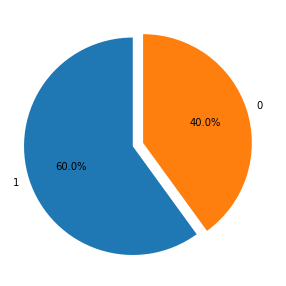

In [304]:
x = ["Parafree Customer"]
plt.figure(figsize=(5, 5))
count = 0

for i in x:
    
    myexplode = [0.1, 0]
    
    labels = data[i].value_counts().index
    sizes = data[i].value_counts().values
    
    plt.pie(sizes, labels=labels, explode=myexplode, startangle=90, autopct='%1.1f%%')
    
    count += 1

In [305]:
data = data.drop(columns=["ID", "City", "Age", "Gender", "Living with family?", "Famlys Job", "Uni.Degree", "Halkbank Customer"], axis=1)

In [306]:
data

,Normal or Evening,Foundation or Public,Scholarship,Major,Do you work,Income Level,Familys Income Level,Parafree Customer
0,Normal,Public,100,Engineering,No,0,4,1
1,Normal,Public,100,Engineering,No,0,4,1
2,Normal,Public,100,Engineering,No,0,4,1
3,Normal,Public,100,Communication,No,0,4,1
4,Normal,Public,100,Communication,No,0,4,1
...,...,...,...,...,...,...,...,...
39168,Normal,Foundation,0,Agreculture,No,0,3,0
39169,Normal,Public,100,Faculty of Education,Yes,4,4,0
39170,Normal,Public,100,Engineering,No,0,3,0
39171,Normal,Public,100,Secience and Literature,No,0,4,0


In [307]:
encoding_list = ["Normal or Evening", "Foundation or Public", "Major", "Scholarship", "Do you work"]

In [308]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()

In [309]:
for x in encoding_list:
    data[x] = label_encoder.fit_transform(data[x])

In [310]:
data

,Normal or Evening,Foundation or Public,Scholarship,Major,Do you work,Income Level,Familys Income Level,Parafree Customer
0,1,1,4,7,0,0,4,1
1,1,1,4,7,0,0,4,1
2,1,1,4,7,0,0,4,1
3,1,1,4,3,0,0,4,1
4,1,1,4,3,0,0,4,1
...,...,...,...,...,...,...,...,...
39168,1,0,0,0,0,0,3,0
39169,1,1,4,8,1,4,4,0
39170,1,1,4,7,0,0,3,0
39171,1,1,4,14,0,0,4,0


In [311]:
x = data.drop("Parafree Customer", axis=1)
y = data["Parafree Customer"]

In [312]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 55, shuffle=1)

In [313]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [314]:
y_pred = model.predict(X_test)

In [315]:
print(confusion_matrix(y_test, y_pred))

[[3431 2869]
 [ 419 8951]]


In [316]:
accuracy_score(y_test, y_pred)

0.7901723037651563

In [317]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.54      0.68      6300
           1       0.76      0.96      0.84      9370

    accuracy                           0.79     15670
   macro avg       0.82      0.75      0.76     15670
weighted avg       0.81      0.79      0.78     15670

